In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [43]:
df = pd.read_csv('/content/drive/MyDrive/PROGRAMMING/MASAI/PYTHON/ML (MACHINE LEARNING)/ASSIGNMENTS /Assignment[ML Project 1]/Student_Performance.csv')

In [44]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [46]:
label_encoder = LabelEncoder()
df['Extracurricular Activities'] = label_encoder.fit_transform(df['Extracurricular Activities'])
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


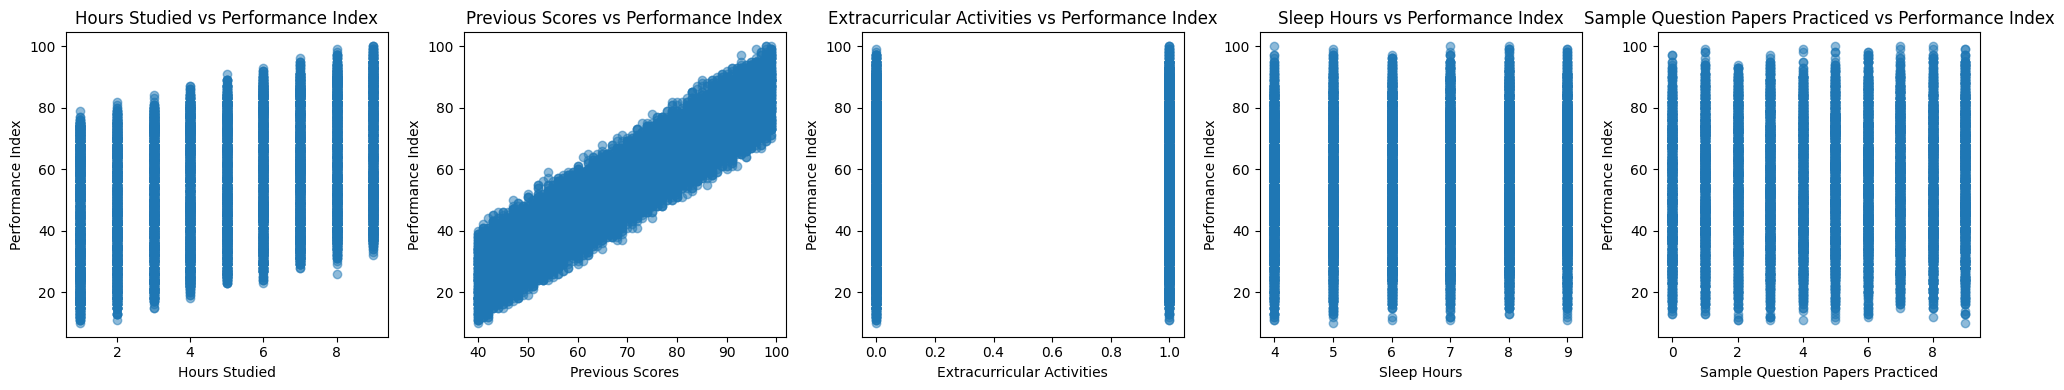

In [47]:
# Define the data for scatter plots
features = ["Hours Studied", "Previous Scores", "Extracurricular Activities", "Sleep Hours", "Sample Question Papers Practiced"]

# Set up subplots for scatter plots of each feature against "Performance Index"
fig, axs = plt.subplots(1, 5, figsize=(20, 4))

# Create scatter plots for each feature
for i, feature in enumerate(features):
    axs[i].scatter(df[feature], df['Performance Index'], alpha=0.5)
    axs[i].set_title(f"{feature} vs Performance Index")
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("Performance Index")

plt.tight_layout()
plt.show()


In [48]:
x = df.drop('Performance Index', axis= 1)
y = df['Performance Index']

In [49]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 5), (2000, 5), (8000,), (2000,))

In [50]:
linear_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state= 42)
random_forest_model = RandomForestRegressor(random_state= 42)
gradient_boosting_model = GradientBoostingRegressor(random_state= 42)

models = {
    'Linear Regression': linear_model,
    'Decision Tree': decision_tree_model,
    'Random Forest': random_forest_model,
    'Gradient Boosting': gradient_boosting_model
}
model_performance  = {}

for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    model_performance[model_name] = {
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'R2 Score': r2
    }

model_performance

{'Linear Regression': {'Mean Absolute Error': 1.6111213463123044,
  'Mean Squared Error': 4.082628398521853,
  'R2 Score': 0.9889832909573145},
 'Decision Tree': {'Mean Absolute Error': 2.3378333333333337,
  'Mean Squared Error': 8.812694444444444,
  'R2 Score': 0.9762195132401258},
 'Random Forest': {'Mean Absolute Error': 1.8147207361111108,
  'Mean Squared Error': 5.158838006796808,
  'R2 Score': 0.9860792088401176},
 'Gradient Boosting': {'Mean Absolute Error': 1.657845356168391,
  'Mean Squared Error': 4.364635848301432,
  'R2 Score': 0.9882223120685143}}

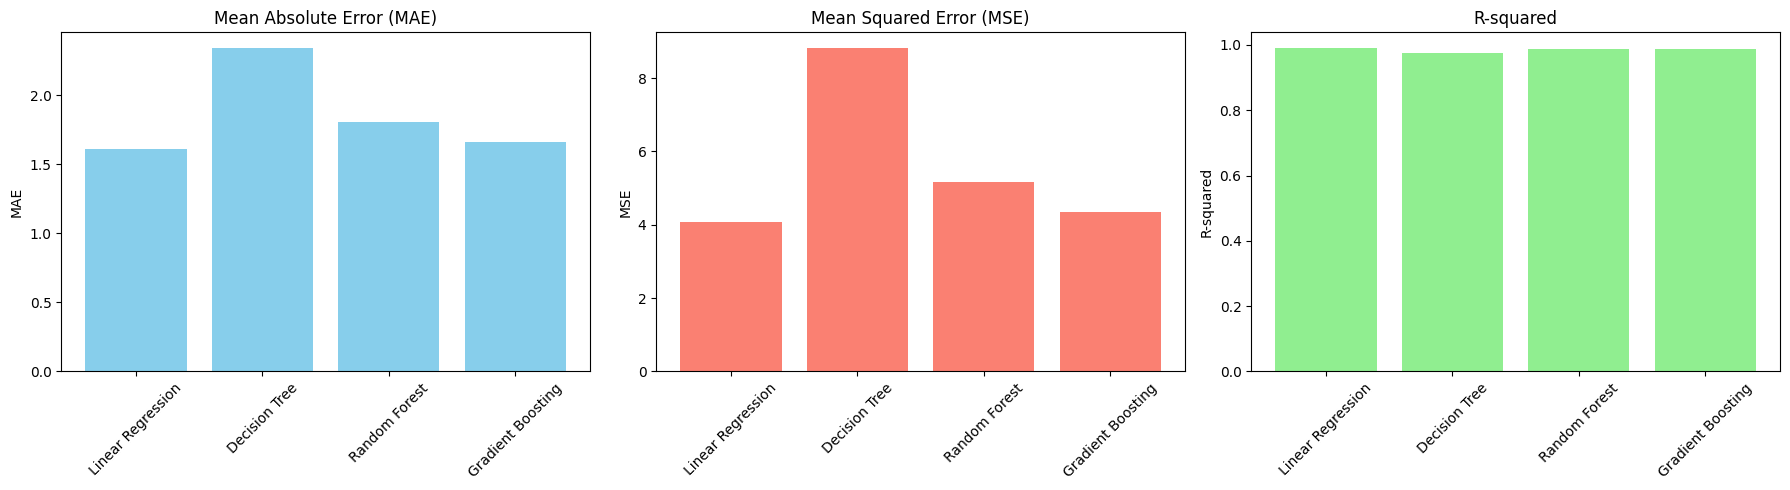

In [51]:
import matplotlib.pyplot as plt

# Define your models and metrics here as in the example
models = ["Linear Regression", "Decision Tree", "Random Forest", "Gradient Boosting"]
mae_values = [1.61, 2.34, 1.81, 1.66]
mse_values = [4.08, 8.81, 5.16, 4.36]
r2_values = [0.989, 0.976, 0.986, 0.988]

# Plotting the metrics
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Mean Absolute Error (MAE)
axs[0].bar(models, mae_values, color='skyblue')
axs[0].set_title('Mean Absolute Error (MAE)')
axs[0].set_ylabel('MAE')
axs[0].tick_params(axis='x', rotation=45)

# Mean Squared Error (MSE)
axs[1].bar(models, mse_values, color='salmon')
axs[1].set_title('Mean Squared Error (MSE)')
axs[1].set_ylabel('MSE')
axs[1].tick_params(axis='x', rotation=45)

# R-squared
axs[2].bar(models, r2_values, color='lightgreen')
axs[2].set_title('R-squared')
axs[2].set_ylabel('R-squared')
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


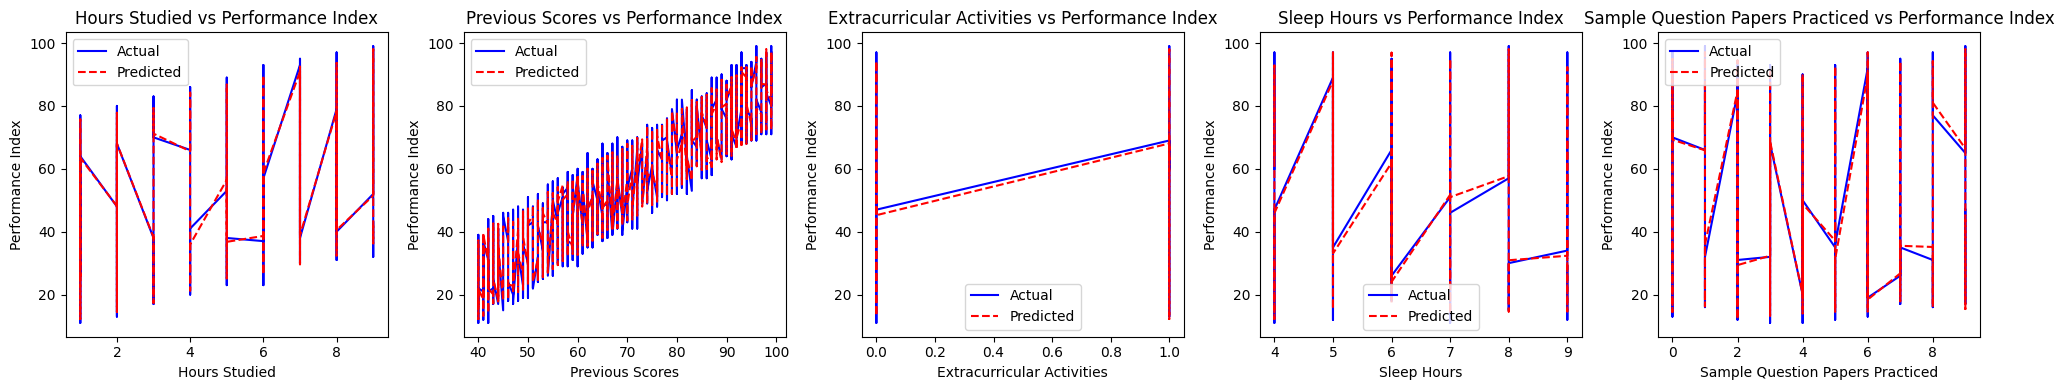

In [52]:
features = ["Hours Studied", "Previous Scores", "Extracurricular Activities", "Sleep Hours", "Sample Question Papers Practiced"]

# Set up subplots for line plots
fig, axs = plt.subplots(1, 5, figsize=(20, 4))

# Create line plots for each feature
for i, feature in enumerate(features):
    # Sort by feature value for smoother lines
    sorted_indices = x_test[feature].argsort()
    sorted_feature = x_test[feature].iloc[sorted_indices]
    sorted_y_test = y_test.iloc[sorted_indices]
    sorted_y_pred = y_pred[sorted_indices]

    # Plot actual and predicted lines
    axs[i].plot(sorted_feature, sorted_y_test, label="Actual", color="blue", linewidth=1.5)
    axs[i].plot(sorted_feature, sorted_y_pred, label="Predicted", color="red", linestyle='--', linewidth=1.5)

    axs[i].set_title(f"{feature} vs Performance Index")
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("Performance Index")
    axs[i].legend()

plt.tight_layout()
plt.show()
